# Neural Network 201
In this example, we will walk through two-input single output neural network model. We will train this model to predict used cars' prices based on two features: age and mileage.

The following contents will be covered:
1. Preprocess the data.
2. Construct multi-input linear model.
3. Vector and matrix operations.
4. Rectified linear unit (ReLU) activation.


## Load Raw Data
Data is from [Used Car Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data). Data is prepocessed and shuffled. N/As and outliers were taken out. 90% are used for training the model. We'll use the rest 10% samples to evaluate and test the model. 

First, let's load the data as numpy arrays.

In [17]:
import numpy as np
age_train = np.load('age_train.npy')
mileage_train = np.load('mileage_train.npy')
price_train = np.load('price_train.npy')
age_test = np.load('age_test.npy')
mileage_test = np.load('mileage_test.npy')
price_test = np.load('price_test.npy')
print(f"age_train shape: {age_train.shape}")
print(f"mileage_train shape: {mileage_train.shape}")
print(f"price_train shape: {age_train.shape}")
print(f"age_test shape: {age_test.shape}")
print(f"mileage_test shape: {mileage_test.shape}")
print(f"price_test shape: {age_test.shape}")


age_train shape: (268577,)
mileage_train shape: (268577,)
price_train shape: (268577,)
age_test shape: (29842,)
mileage_test shape: (29842,)
price_test shape: (29842,)


## Visualize the Data
Use [matplotlib](https://matplotlib.org/). **Note**: `matplotlib` will auto scale the figure to better fill the space.

[Text(0.5, 0, 'Mileage (miles)'), Text(0, 0.5, 'Price ($)')]

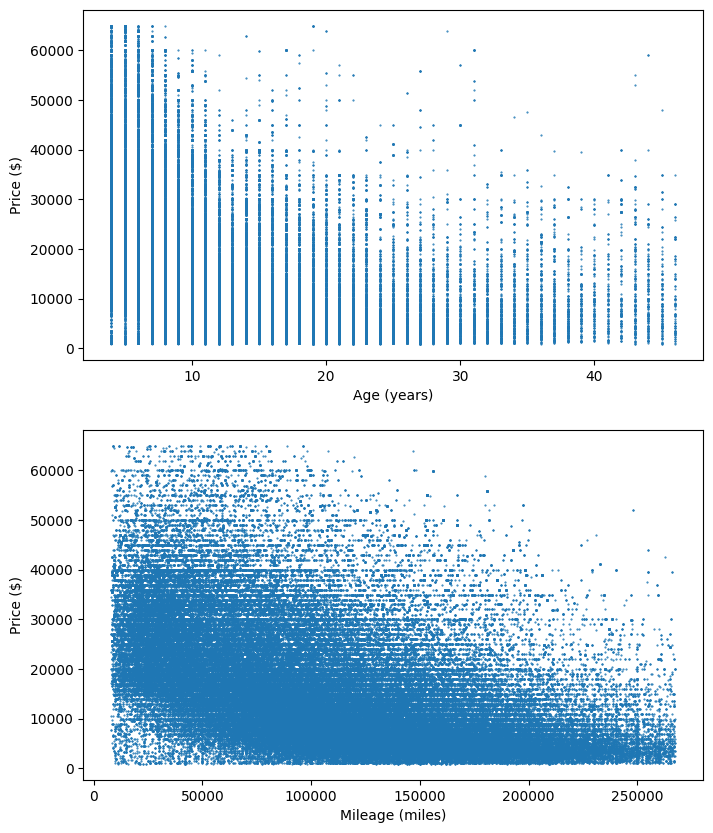

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(age_train, price_train, '.', markersize=1)
axs[0].set(xlabel='Age (years)', ylabel='Price ($)')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(mileage_train, price_train, '.', markersize=1)
axs[1].set(xlabel='Mileage (miles)', ylabel='Price ($)')


Visualize raw data in 3D space

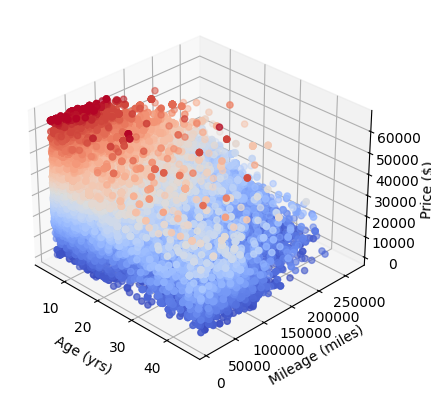

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the data
scatter = ax.scatter3D(age_train, mileage_train, price_train, c=price_train, cmap='coolwarm') 

ax.set_xlabel('Age (yrs)')
ax.set_ylabel('Mileage (miles)')
ax.set_zlabel('Price ($)')

ax.view_init(elev=30, azim=-45)  # set elevation and azimuth of viewing angle

# colorbar = fig.colorbar(scatter, ax=ax)

## Pre-process the Data
1. Rescale `age`, `mileage` and `price` arrays to avoid large parameters in model. 
2. Stack the rescaled `age` and `mileage` arrays to form a feature matrix, or a 2d-array with shape (M, 2). 
3. Reshape rescaled `price` array to a column vector, or a 2d-array with shape (M, 1).
> M represents number of samples.

(268577, 2) (268577, 1) (29842, 2) (29842, 1)


[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

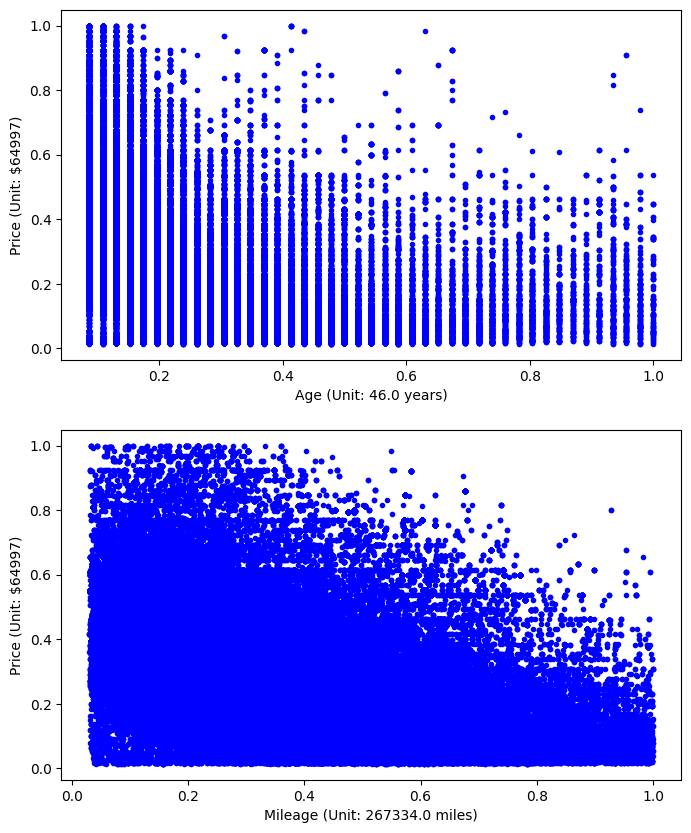

In [20]:
# Rescale
# age_train_rescale = age_train / 10
# mileage_train_rescale = mileage_train / 1e4
# price_train_rescale = price_train / 1e4
# age_test_rescale = age_test / 10
# mileage_test_rescale = mileage_test / 1e4
# price_test_rescale = price_test / 1e4
age_train_rescale = age_train / age_train.max()
mileage_train_rescale = mileage_train / mileage_train.max()
price_train_rescale = price_train / price_train.max()
age_test_rescale = age_test / age_train.max()
mileage_test_rescale = mileage_test / mileage_train.max()
price_test_rescale = price_test / price_train.max()

# Stack features
X_train = np.stack((age_train_rescale, mileage_train_rescale), axis=1)
X_test = np.stack((age_test_rescale, mileage_test_rescale), axis=1)
# Reshape labels
y_train = price_train_rescale.reshape(-1, 1)
y_test = price_test_rescale.reshape(-1, 1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)  # for debug

# Visualize preprocessed data
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_train[:, 0], y_train, 'b.')
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_train[:, 1], y_train, 'b.')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

## Create an Initial Model
Create a linear model: $\hat{y}=w_1x_1 + w_2x_2 + b$. Initialize three parameters, $w_1$, $w_2$ and $b$ to small values (close to 0).

(268577, 1)


[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

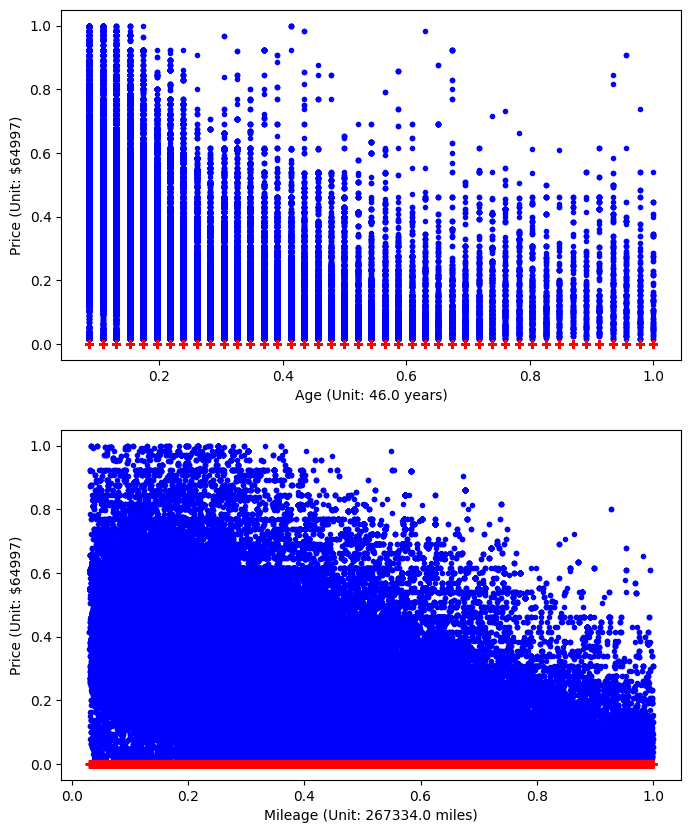

In [21]:
# Define model function
def forward(input, weight, bias):
    """ Model function
    Args:
        input: feature matrix (independent variables), 2d-array with shape (# samples, # features)
        weight: row vector of weights, 2d-array with shape (1, # features)
        bias: scalar
    Returns:
        output: column vector of predictions (dependent variables), 2d-array with shape (# samples, 1)
    """
    output = np.dot(input, weight.T) + bias
    return output

# Initialize model parameters: w1, w2, b
w = np.zeros((1, 2)) + np.random.normal(0, 1e-4, (1, 2)) 
b = 0 + np.random.normal(0, 1e-4)
y_pred = forward(X_train, w, b)
print(y_pred.shape)

# Visualize intial model on two planes
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_train[:, 0], y_train, 'b.')
axs[0].plot(X_train[:, 0], y_pred, 'r+')
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_train[:, 1], y_train, 'b.')
axs[1].plot(X_train[:, 1], y_pred, 'r+')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

## Create Loss Function
Use Mean Square Error function to evaluate how bad the model was.

In [22]:
def mse_loss(prediction, target):
    """ Mean Square Error function
    Args:
        prediction: column vector of predictions, 2d-array with shape (# samples, 1)
        target: column vector of ground truths, 2d-array with shape (# samples, 1)
    Returns:
        loss_value: scalar
    """
    loss_value = np.mean((prediction - target) ** 2)
    return loss_value

# Evaluate initial model
loss = mse_loss(prediction=y_pred, target=y_train)
print(f"mse loss: {loss}")

mse loss: 0.10275592442869921


## Gradient Descent Optimization

loss @ 1 iteration: 0.10275592442869921
loss @ 2 iteration: 0.09968088180616437
loss @ 3 iteration: 0.09675177500504639
loss @ 4 iteration: 0.09396161873716259
loss @ 5 iteration: 0.09130376216655295
loss @ 6 iteration: 0.08877187289590698
loss @ 7 iteration: 0.0863599217197208
loss @ 8 iteration: 0.08406216810747318
loss @ 9 iteration: 0.08187314638186768
loss @ 10 iteration: 0.07978765255886049
loss @ 11 iteration: 0.07780073181778818
loss @ 12 iteration: 0.07590766657142599
loss @ 13 iteration: 0.07410396510725184
loss @ 14 iteration: 0.0723853507725669
loss @ 15 iteration: 0.07074775167743276
loss @ 16 iteration: 0.06918729089063223
loss @ 17 iteration: 0.06770027710504763
loss @ 18 iteration: 0.06628319574998093
loss @ 19 iteration: 0.06493270052901631
loss @ 20 iteration: 0.06364560536304989
loss @ 21 iteration: 0.062418876719087336
loss @ 22 iteration: 0.06124962630633891
loss @ 23 iteration: 0.060135104122025405
loss @ 24 iteration: 0.059072691830151285
loss @ 25 iteration: 0.0

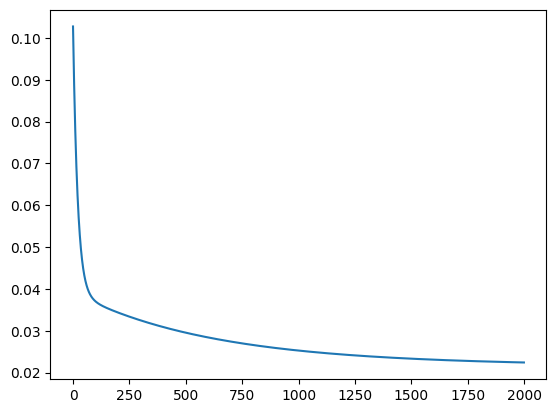

In [23]:
# Define gradient computation function
def grad(prediction, target, input):
    """ Gradient function
    Args:
        prediction: column vector of predictions, 2d-array with shape (# samples, 1)
        target: column vector of ground truths, 2d-array with shape (# samples, 1)
        input: feature matrix, 2d-array with shape (# samples, # features)
    Returns:
        dw: row vector of MSE loss partial derivatives w.r.t. weights, 2d-array with shape (1, # features)
        db: scalar of MSE loss partial derivatives w.r.t. bias
    """
    dw = 1 / target.shape[0] * np.dot((prediction - target).T, input)  # dL/dw
    db = (prediction - target).mean()  # dL/db
    
    return dw, db

# Gradient descent optimization
num_iters = 2000
learning_rate = 0.02
losses = []
for i in range(num_iters):
    y_pred = forward(X_train, w, b)
    dw, db = grad(y_pred, y_train, X_train)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")
    losses.append(loss)
print(f"updated w={w}, b={b}")

# Observe the loss change
plt.plot(losses)

## Assess Model on Training Data
Now, we can use the updated model with **updated** $w_1$, $w_2$ and $b$ to predict car prices.

[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

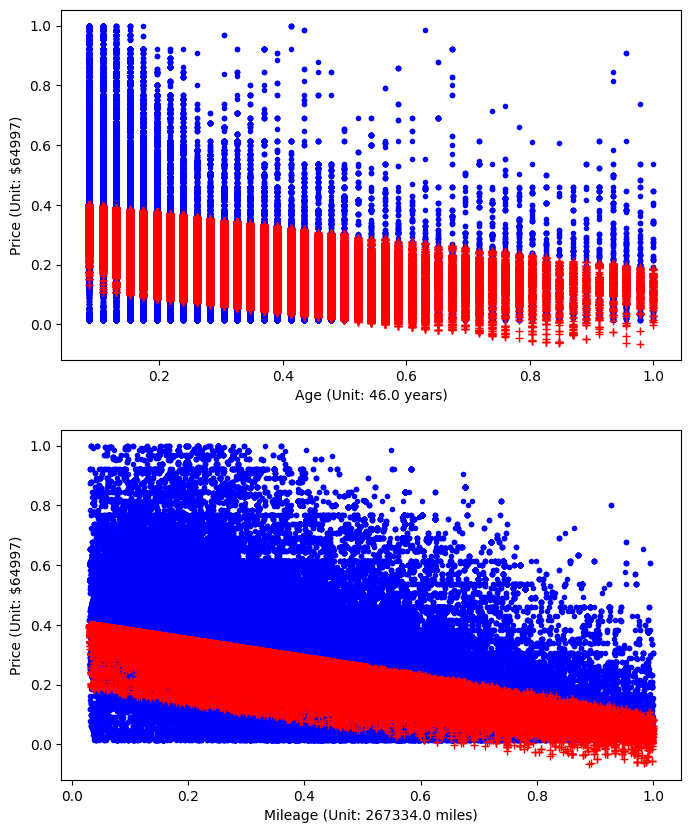

In [24]:
# Visualize model on training data
fig, axs = plt.subplots(2,1)  # Initialize figures in 2 rows, 1 column
fig.set_figwidth(8)  # set figure size
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)  # plot in the first figure
axs[0].plot(X_train[:, 0], y_train, 'b.')  # draw blue dots
axs[0].plot(X_train[:, 0], y_pred, 'r+')  # draw red '+' markers
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')  # label axes
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_train[:, 1], y_train, 'b.')
axs[1].plot(X_train[:, 1], y_pred, 'r+')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

### Assess Model on Test Data

Model's mse on test data: 0.02313354569870378


[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

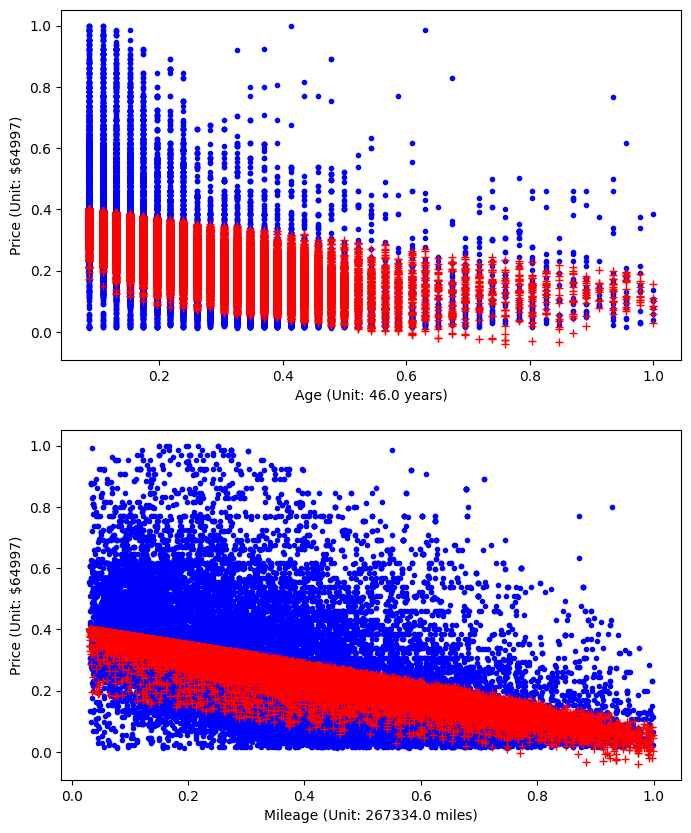

In [25]:
# Compute MSE
print(f"Model's mse on test data: {mse_loss(forward(X_test, w, b), y_test)}")

# Visualization
y_test_pred = forward(X_test, w, b)
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_test[:, 0], y_test, 'b.')
axs[0].plot(X_test[:, 0], y_test_pred, 'r+')
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_test[:, 1], y_test, 'b.')
axs[1].plot(X_test[:, 1], y_test_pred, 'r+')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

## Train a Model with a Single Feature
Is model trained with two-feature data (`X_train`) better than the model trained with only one feature (`X_train[:, 0]` or `X_train[:, 1]`)?

loss @ 1 iteration: 0.10278503657095726
loss @ 2 iteration: 0.0999004447964306
loss @ 3 iteration: 0.09714001460194872
loss @ 4 iteration: 0.09449838265560427
loss @ 5 iteration: 0.09197041727265197
loss @ 6 iteration: 0.0895512084115793
loss @ 7 iteration: 0.08723605810217959
loss @ 8 iteration: 0.08502047128697306
loss @ 9 iteration: 0.08290014705812657
loss @ 10 iteration: 0.08087097027279389
loss @ 11 iteration: 0.07892900353053549
loss @ 12 iteration: 0.0770704794971826
loss @ 13 iteration: 0.07529179356018538
loss @ 14 iteration: 0.07358949680113125
loss @ 15 iteration: 0.07196028927173703
loss @ 16 iteration: 0.07040101356021056
loss @ 17 iteration: 0.0689086486354428
loss @ 18 iteration: 0.06748030395703342
loss @ 19 iteration: 0.06611321383967007
loss @ 20 iteration: 0.0648047320608785
loss @ 21 iteration: 0.0635523267016334
loss @ 22 iteration: 0.062353575209775254
loss @ 23 iteration: 0.06120615967661134
loss @ 24 iteration: 0.060107862317495396
loss @ 25 iteration: 0.059056

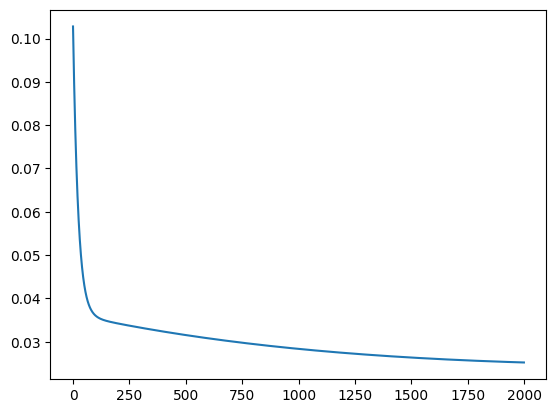

In [26]:
# Initialize model parameters: w1, b1
w = np.zeros((1, 1)) + np.random.normal(0, 1e-4, (1, 1)) 
b = 0 + np.random.normal(0, 1e-4)

# Set hyper-parameters
num_iters = 2000
learning_rate = 0.02

# Iterate params update
losses = []
for i in range(num_iters):
    y_pred = forward(X_train[:, 0].reshape(-1, 1), w, b)
    dw, db = grad(y_pred, y_train, X_train[:, 1].reshape(-1, 1))
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)
print(f"updated w1={w}, b={b}")

# Observe loss values
plt.plot(losses)
print(f"Model's mse on test data: {mse_loss(forward(X_test[:, 0].reshape(-1, 1), w, b), y_test)}")


## Sigmoid Activation

loss @ 1 iteration: 0.09018822335219634
loss @ 2 iteration: 0.08991250720983408
loss @ 3 iteration: 0.08963803842869804
loss @ 4 iteration: 0.08936481283650989
loss @ 5 iteration: 0.08909282625035479
loss @ 6 iteration: 0.08882207447709096
loss @ 7 iteration: 0.08855255331375479
loss @ 8 iteration: 0.08828425854796178
loss @ 9 iteration: 0.08801718595830334
loss @ 10 iteration: 0.08775133131473917
loss @ 11 iteration: 0.08748669037898561
loss @ 12 iteration: 0.08722325890489957
loss @ 13 iteration: 0.08696103263885846
loss @ 14 iteration: 0.08670000732013558
loss @ 15 iteration: 0.0864401786812716
loss @ 16 iteration: 0.08618154244844171
loss @ 17 iteration: 0.08592409434181845
loss @ 18 iteration: 0.0856678300759306
loss @ 19 iteration: 0.08541274536001758
loss @ 20 iteration: 0.08515883589837998
loss @ 21 iteration: 0.08490609739072565
loss @ 22 iteration: 0.08465452553251179
loss @ 23 iteration: 0.08440411601528289
loss @ 24 iteration: 0.0841548645270044
loss @ 25 iteration: 0.08390

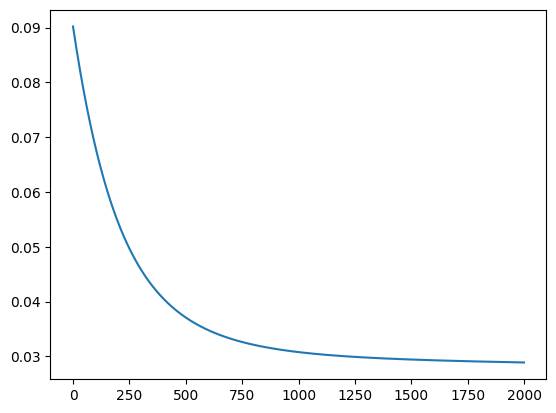

In [27]:
# Define ReLU function
def sigmoid(x):
    """ Sigmoid function
    Args:
        x: independent variable, could be an arrary of any shape or a scalar.
    Returns:
        y: dependent variable, could be an arrary of any shape or a scalar.
    """
    y = 1 / (1 + np.exp(-x))
    return y

# Define derivatives of ReLU function
def d_sigmoid(x):
    """ Derivative of sigmoid function
    Args:
        x: independent variable, could be an arrary of any shape or a scalar.
    Returns:
        dydx: dependent variable, could be an arrary of any shape or a scalar.
    """
    dydx = sigmoid(x) * (1 - sigmoid(x))
    return dydx

# Redefine forward pass. Intermediate result, Z, needs to be tracked 
def forward(input, weight, bias):
    """ Model function
    Args:
        input: feature matrix (independent variables), 2d-array with shape (# samples, # features)
        weight: row vector of weights, 2d-array with shape (1, # features)
        bias: scalar
    Returns:
        output: column vector of predictions (sigmoid activated outcomes), 2d-array with shape (# samples, 1)
        Z: column vector of intermediate outputs, 2d-array with shape (# samples, 1)
    """
    Z = np.dot(input, weight.T) + bias
    output = sigmoid(Z)
    return output, Z

# Redefine gradient function. An exatra step to calculate dL/dZ will be added. 
def grad(prediction, target, Z, input):
    """ Gradient function with sigmoid activation
    Args:
        prediction: column vector of predictions, 2d-array with shape (# samples, 1)
        target: column vector of ground truths, 2d-array with shape (# samples, 1)
        Z: column vector of intermediate outputs, 2d-array with shape (# samples, 1)
        feature: feature matrix, 2d-array with shape (# samples, # features)
    Returns:
        dw: row vector of MSE loss partial derivatives w.r.t. weights, 2d-array with shape (1, # features)
        db: scalar of MSE loss partial derivatives w.r.t. bias
    """
    dZ = (prediction - target) * d_sigmoid(Z)
    dw = 1 / target.shape[0] * np.dot(dZ.T, input)
    db = dZ.mean()
    
    return dw, db

# Optimization with ReLU activation
w = np.zeros((1, 2)) + np.random.normal(0, 1e-4, (1, 2)) 
b = 0 + np.random.normal(0, 1e-4)
num_iters = 2000
learning_rate = 0.03
losses = []
for i in range(num_iters):
    y_pred, Z = forward(X_train, w, b)
    dw, db = grad(y_pred, y_train, Z, X_train)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")
    losses.append(loss)
print(f"updated w={w}, b={b}")
print(f"Model's mse on test data: {mse_loss(forward(X_test, w, b), y_test)}")

# Observe loss values
plt.plot(losses)

## Test Sigmoid Activated Model

Model's mse on test data: 0.029753382255764977


[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

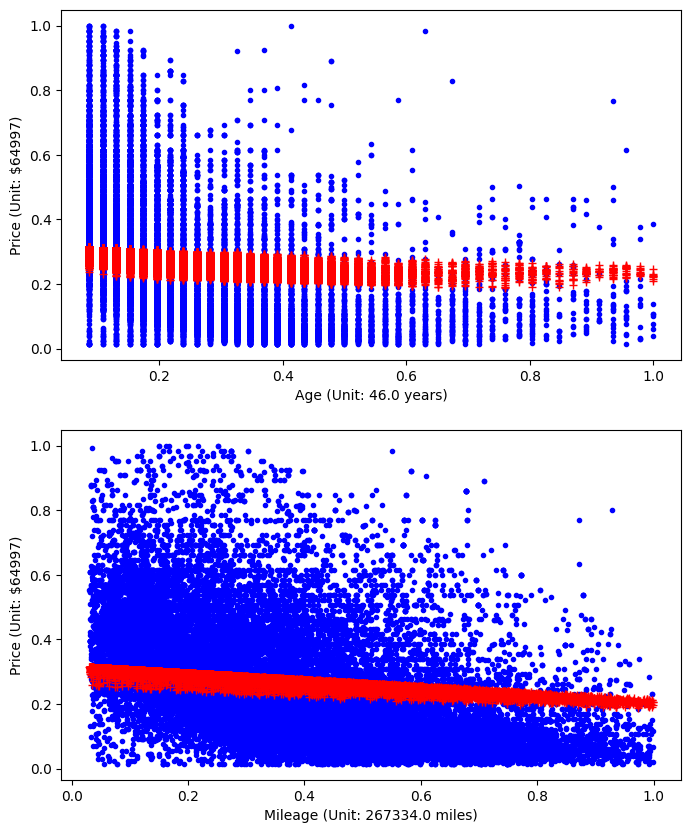

In [28]:
y_test_pred, _ = forward(X_test, w, b)
print(f"Model's mse on test data: {mse_loss(y_test_pred, y_test)}")

# Visualize model on two dimensions
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_test[:, 0], y_test, 'b.')
axs[0].plot(X_test[:, 0], y_test_pred, 'r+')
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_test[:, 1], y_test, 'b.')
axs[1].plot(X_test[:, 1], y_test_pred, 'r+')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

## 